# TP3

### Exercice 2 : l’algorithme de Simon 

#### A. Le problème  

Le problème classique de Simon est un problème avec oracle* dont il est prouvé que ce problème ne peut 
pas être résolu par un algorithme classique aléatoire non-exponentiel.  
On a une fonction F inconnue (boite noire), elle a une des deux formes possibles : 
1. F(x)=y=x. 
2. F(x)=y, et y a deux valeurs possibles. 
Nous savons que dans cette forme, on a b une chaine de bits où :  
    a. Soit x1 et x2 : f(x1) = f(x2) alors il est sûr : x1 ⊕ x2 = B

## B. La solution
Étant donné cette fonction inconnue, comment pouvons-nous déterminer efficacement si F est forme 1 ou
2 ? Et à quelle vitesse on peut déterminer b si on est dans la deuxième forme ? On peut définir le problème
comme la recherche de b chaine de bits et la chaine 000… correspond à la forme 1. C’est l’algorithme de
SIMON qui implémente la solution quantique et qui répond à cette question : https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/simon.ipynb

### Solution classique

Classiquement, si nous voulons connaître la valeur de ss avec une certitude de 100 % pour une fonction f donnée, nous devons vérifier jusqu'à 2n−1+1 entrées, où n est le nombre de bits de l'entrée. Cela signifie vérifier un peu plus de la moitié de toutes les entrées possibles jusqu'à ce que nous trouvions deux cas avec le même résultat. Comme dans le problème de Deutsch-Jozsa, il est possible, avec de la chance, de résoudre le problème dès les deux premiers essais. Mais si la fonction f est injective, ou si nous sommes vraiment malchanceux avec une fonction f qui est deux-à-un, alors nous devons effectuer la recherche complète, soit 2n−1+1 essais. Il existe des algorithmes connus qui ont une limite inférieure plus efficace (voir la Référence 2 ci-dessous), mais de manière générale, la complexité de ce problème augmente de façon exponentielle avec n.


ans le pire cas du problème de Simon en solution classique, où l'on doit vérifier jusqu'à 2n−1+1 entrées, cela se produit lorsque :

    La fonction f est deux-à-un (c'est-à-dire qu'il existe exactement deux entrées x et y telles que f(x)=f(y) pour chaque paire avec x⊕y=s), et
    On ne tombe pas sur une collision dès les premiers essais.

En d'autres termes, il faut essayer une grande partie des 2^n entrées avant de trouver deux valeurs différentes ayant le même résultat pour pouvoir en déduire le masque secret s. Cette absence de collision dans les premiers essais impose de tester systématiquement de nombreuses combinaisons, jusqu'à atteindre environ la moitié des entrées possibles, soit 2^n−1+1, pour garantir que l'on ait effectivement une collision et que l'on puisse déduire la valeur de s.

### Questions : 
1. Implémenter les circuits qui représentent l’oracle de votre fonction :  

In [5]:
from qiskit import *
import numpy as np
from qiskit import QuantumCircuit

In [6]:


# Taille de l'entrée (n qubits de chaque côté)
n = 3

# Créer un circuit quantique avec 2n qubits
simon_oracle = QuantumCircuit(n*2)

# Placer une barrière pour séparer les étapes
simon_oracle.barrier()

# Implémenter les CNOT pour simuler l'oracle
for i in range(n):  # Pour chaque qubit du premier groupe
    for j in range(n, 2*n):  # Pour chaque qubit du second groupe
        simon_oracle.cx(i, j)

# Ajouter une barrière après les CNOT
simon_oracle.barrier()

# Afficher le circuit pour vérifier la structure
simon_oracle.draw()


░                                               ░ 
q_0: ─░───■────■─────────■────────────────────────────░─
      ░   │    │         │                            ░ 
q_1: ─░───┼────┼────■────┼────■─────────■─────────────░─
      ░   │    │    │    │    │         │             ░ 
q_2: ─░───┼────┼────┼────┼────┼────■────┼────■────■───░─
      ░ ┌─┴─┐  │  ┌─┴─┐  │    │  ┌─┴─┐  │    │    │   ░ 
q_3: ─░─┤ X ├──┼──┤ X ├──┼────┼──┤ X ├──┼────┼────┼───░─
      ░ └───┘┌─┴─┐└───┘  │  ┌─┴─┐└───┘  │  ┌─┴─┐  │   ░ 
q_4: ─░──────┤ X ├───────┼──┤ X ├───────┼──┤ X ├──┼───░─
      ░      └───┘     ┌─┴─┐└───┘     ┌─┴─┐└───┘┌─┴─┐ ░ 
q_5: ─░────────────────┤ X ├──────────┤ X ├─────┤ X ├─░─
      ░                └───┘          └───┘     └───┘ ░

2. Existe-t-il d’autres implémentations ?

- Il existe pleins d'autres manières d'implémenter, on peut se baser sur les portes de phases, les portes de Toffoli et CCNOT, les portes x controlés, matrice d'unités ... 

3. Implémenter l’algorithme Deutsch-jozsa généralisé à n qubits (voir la documentation du lien
précédent)

In [15]:
from qiskit_textbook.tools import simon_oracle

b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b))

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

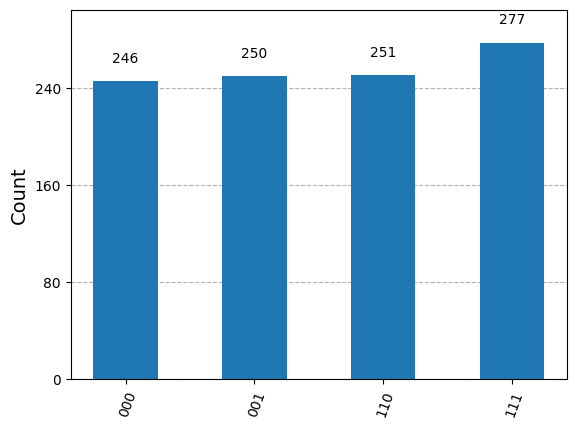

In [16]:
from qiskit_aer import Aer
import matplotlib.pyplot as plt 
from qiskit.visualization import * # Import les visualizations de quiskit

# use local simulator
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(simon_circuit).result()
counts = results.get_counts()


plot_histogram(counts)

6. Finaliser votre rapport en expliquant les différentes étapes et le résultat de votre implémentation
sur le simulateur (aer_simulator) et le vrai ordinateur quantique IBM

Etapes de simulations : 
- Tout d'abord on met tous les qubits de l'entrées dans l'état de Hadamard, afin d'avoir un ensemble de qubits supérposées. Uniquement les qubits de l'entrée numéro 1.
- On ajoute l'oracle qui permet de calculer O + f(x). Si f(x) = x dans les mesures nous riendront aux états de bases sinon en mesurant nous donera x + b sinon ou b est la chaine de b bits, car fera l'inverse du modulo. 
- on applique de nouveau la porte Hadamard sur tous les qubits de l'entrée numéro 1, afin d'avoir leur état de bases.  
- Selon la valeur de b déduite on peut savoir s'il sagit d'un état changer ou non. 


On remarque que l'implémentation sur le simulateur Aer avec un oracle équilibrée donne une mesure des qubits finale dans l'état 111, qui est autre que 000. 